In [ ]:
import numpy as np
import pandas as pd
#from numpy import randn
from scipy.stats import skew, kurtosis, mode
df = pd.read_excel("Titanic.xlsx")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
mean =df["Age"].mean()
print(mean)

29.69911764705882


In [12]:
median = df["Fare"].median()
print(median)

14.4542


In [14]:
mode_emb=df["Embarked"].mode()[0]
print(mode_emb)

S


In [24]:
fare_stats = df.groupby('Pclass')['Fare'].agg(['mean', 'median', lambda x: mode(x)[0]])
fare_stats.rename(columns={"<lambda_0>": "mode"}, inplace=True)
print(fare_stats)

             mean   median   mode
Pclass                           
1       84.154687  60.2875  26.55
2       20.662183  14.2500  13.00
3       13.675550   8.0500   8.05


In [26]:
sibs_mean=df["SibSp"].mean()
sibs_median=df["SibSp"].median()
print(sibs_mean,"\n",sibs_median)

0.5230078563411896 
 0.0


In [29]:
fare_skew = skew(df['Fare'].dropna())
age_kurtosis = kurtosis(df['Age'].dropna())
parch_skew = skew(df['Parch'])
print(fare_skew)
print(age_kurtosis,"\n",age_kurtosis)

4.7792532923723545
0.16863657224286044 
 0.16863657224286044


In [30]:
survived_skew = skew(df['Survived'])
survived_kurt = kurtosis(df['Survived'])
print(survived_skew,"\n",survived_kurt)

0.4777174662568536 
 -1.7717860224331319


In [6]:
age_skew = skew(df['Age'].dropna())
fare_kurt = kurtosis(df['Fare'].dropna())

In [9]:
Exp=[1,2,3,4,5]
Salary=[1000,2500,4000,5000,7000]
mean=np.mean(Exp)
std=np.std(Exp)
print(mean)
print(std)

3.0
1.4142135623730951


In [19]:
standardised_exp=[(i-mean)/std for i in Exp]
print(standardised_exp)

[np.float64(-1.414213562373095), np.float64(-0.7071067811865475), np.float64(0.0), np.float64(0.7071067811865475), np.float64(1.414213562373095)]


In [17]:
mean_salary = np.mean(Salary)
std_salary = np.std(Salary)
Standardized_salary = [(i - mean_salary)/std_salary for i in Salary]
print(mean_salary)
print(std_salary)
print(Standardized_salary)

3900.0
2059.1260281974
[np.float64(-1.4083645004180332), np.float64(-0.6799001036500849), np.float64(0.04856429311786321), np.float64(0.5342072242964953), np.float64(1.5054930866537595)]


In [25]:
df_std=pd.DataFrame([Exp, Salary, standardised_exp, Standardized_salary],index=["Exp","Salary","standardised_value","std_salary"])
print(df_std)

                              0            1            2            3  \
Exp                    1.000000     2.000000     3.000000     4.000000   
Salary              1000.000000  2500.000000  4000.000000  5000.000000   
standardised_value    -1.414214    -0.707107     0.000000     0.707107   
std_salary            -1.408365    -0.679900     0.048564     0.534207   

                              4  
Exp                    5.000000  
Salary              7000.000000  
standardised_value     1.414214  
std_salary             1.505493  


In [23]:
mean_std_exp = np.mean(standardised_exp)
std_std_exp = np.std(standardised_exp)
mean_std_salary = np.mean(Standardized_salary)
std_std_salary = np.std(Standardized_salary)

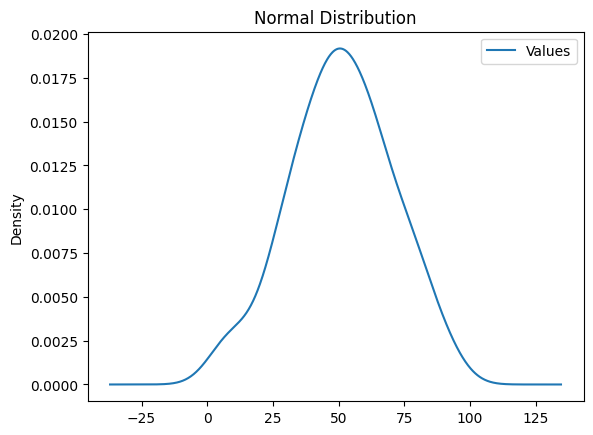

In [ ]:
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

# Step 2 - Generate data
data = stats.norm.rvs(loc=50, scale=20, size=100)

# Step 3 - Convert to DataFrame
df = pd.DataFrame(data, columns=['Values'])

# Step 4 - Plot density curve
df.plot.density(title='Normal Distribution')

# Step 5 - Compute mean & median
mean_val = df['Values'].mean()
median_val = df['Values'].median()


In [5]:
# H0: μ = 168, H1: μ ≠ 168
pop_mean = 168
pop_std = 3.9
sample_size = 36
sample_mean = 169.5

# Z-score
z_score = (sample_mean - pop_mean) / (pop_std / np.sqrt(sample_size))

# Z critical (two-tailed, 95%)
z_critical = stats.norm.ppf(1 - 0.05/2)

# Conclusion
reject_null = abs(z_score) > z_critical

In [6]:
pop_std = 5.6
sample_mean = 32
n = 40

for confidence in [0.80, 0.90, 0.98]:
    alpha = 1 - confidence
    z_critical = stats.norm.ppf(1 - alpha / 2)
    margin = z_critical * (pop_std / np.sqrt(n))
    lower = sample_mean - margin
    upper = sample_mean + margin
    print(f"{int(confidence*100)}% CI: ({lower:.2f}, {upper:.2f})")


80% CI: (30.87, 33.13)
90% CI: (30.54, 33.46)
98% CI: (29.94, 34.06)


In [7]:
from scipy.stats import ttest_1samp

sample = np.random.normal(140, 20, 30)  # or use exact mean and std
t_stat = (140 - 100) / (20 / np.sqrt(30))

# T-critical for 2-tailed test
t_critical = stats.t.ppf(1 - 0.05/2, df=29)

# Built-in t-test
t_stat2, p_value = ttest_1samp(sample, popmean=100)


In [8]:
sample_mean = 20
sample_std = 3.5
n = 15
confidence = 0.95
alpha = 1 - confidence

t_critical = stats.t.ppf(1 - alpha/2, df=n-1)
margin = t_critical * (sample_std / np.sqrt(n))

lower = sample_mean - margin
upper = sample_mean + margin


In [ ]:
my_var=np.random.randn(4,3)
print(my_var)

[[ 0.00701248 -1.08044727 -1.47909709]
 [ 1.47064721 -0.22340028  0.33979324]
 [ 1.96259624  0.31019821 -0.41985941]
 [ 0.53570861 -2.51607777  0.36421888]]
